1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [97]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display
import pickle

In [ ]:
# we need to compare the averages using the Z test
# null hypothesis
mu = 6.3
var = 6.3
std = np.sqrt(var)

# 2005 observation of 15 hurricanes
x0 = 15

x = np.arange(0, 20)

# poisson distribution data for y-axis
y = sp.stats.poisson.pmf(x, mu=mu)
# plotting the graph
plt.plot(x, y, marker='.', linestyle='none', label="Poisson pmf")
plt.axvline(x0, linestyle='--', color='red', label="year 2005")
plt.axvline(mu, linestyle='--', color='lightblue', label="historical average")
plt.legend()
plt.title("2005 observation")
plt.ylabel("probability")
plt.xlabel("x")
plt.show()

# determine the Z score
Z = abs(x0 - mu) / std
print("Z score: %.4f" %Z)

fig, ax = plt.subplots(figsize=(10, 4))
x = np.linspace(-2, 6, 1000)
y = sp.stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y)
plt.axvline(Z, linestyle='--', color='orange', label="Z")
plt.axvline(2, linestyle='-', color='red', label="$2\sigma$ distance")
plt.axvline(0, linestyle='--', color='lightblue', label="average")
plt.title("Normal distribution")
plt.ylabel("probability")
plt.xlabel("x")
plt.legend()
plt.show()
print("since the value for Z is well outside of the confidence interval, we can confirm")
print("that the hypothesis of 2005 being significantly higher in hurricanes count holds.")


In [ ]:
pvalue = 1-sp.stats.norm.cdf(Z)
print("p-value: %.5f" %pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [ ]:
# importing the data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

# calculate the test statistics T
muPre = np.mean(pre)
muPost = np.mean(post)
varPre = np.var(pre, ddof=1)
varPost = np.var(post, ddof=1)
sigma = np.sqrt((varPre+varPost)/2)
T = (muPre-muPost)/(sigma*np.sqrt(2/len(pre)))

print("T score: %.3f" %T)

In [ ]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = sp.stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='orange')
plt.title("Test statistics")
plt.ylabel("p")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = sp.stats.t.cdf(T, len(pre) - 1) + (1. - sp.stats.t.cdf(-T, len(pre) - 1))
print("p-value =", pvalue)
print("we are not provided with a value for alpha, but if we consider a typical threshold")
print("of alpha=0.05, we reject the null hypothesis: the treatment was not significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

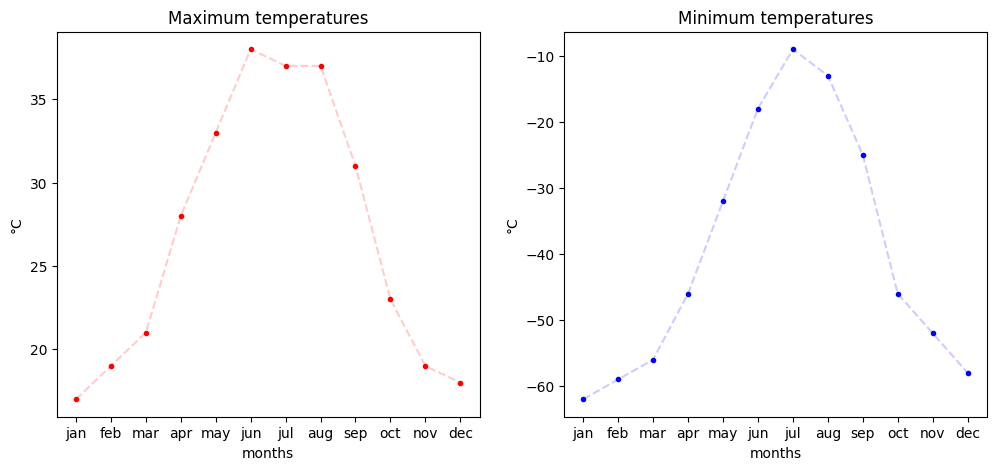

In [260]:
# data input
max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

# plotting
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(months, max, marker='.', linestyle='none', color='red')
ax[0].plot(months, max, linestyle='--', alpha=0.2, color='red')
ax[0].set_xlabel("months")
ax[0].set_ylabel("°C")
ax[0].set_title("Maximum temperatures")
ax[1].plot(months, min, marker='.', linestyle='none', color='blue')
ax[1].plot(months, min, linestyle='--', alpha=0.2, color='blue')
ax[1].set_xlabel("months")
ax[1].set_ylabel("°C")
ax[1].set_title("Minimum temperatures")
fig.show()

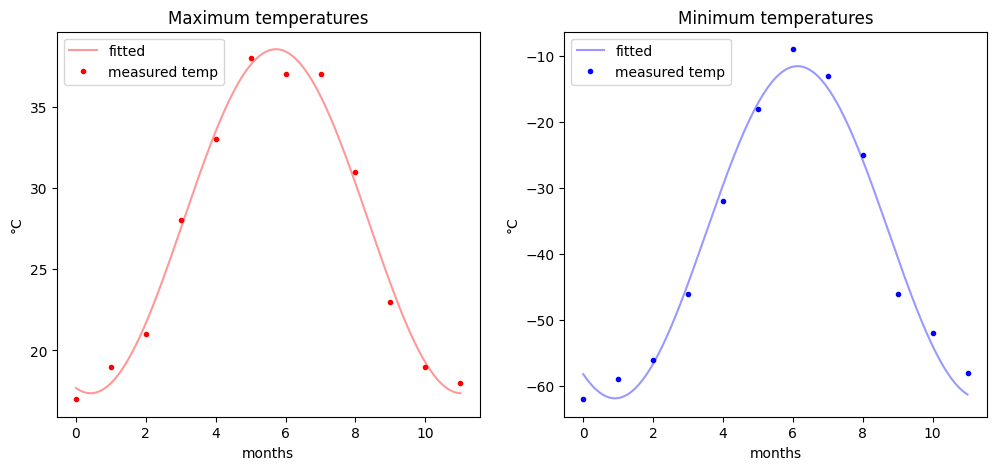

In [261]:
# the plots resemble two gaussian distributions with appropriate coefficients
# to scale and offset
# define the parametric curve
def f(x, A, w, c, off):
    return A*np.sin(w*(x+c))+off

months = [x for x in range(0,12)]
popt_max, pcov_max = sp.optimize.curve_fit(f, months, max, p0=[10, 1, 1, 27], full_output=False)
popt_min, pcov_min = sp.optimize.curve_fit(f, months, min, p0=[-50, 1, 1, -60], full_output=False)

fitted_x = np.linspace(0,11,1000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(fitted_x, f(fitted_x, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='red', label='fitted', alpha=0.4)
ax[0].plot(months, max, marker='.', linestyle='none', color='red', label='measured temp')
ax[0].set_xlabel("months")
ax[0].set_ylabel("°C")
ax[0].set_title("Maximum temperatures")
ax[0].legend()

ax[1].plot(fitted_x, f(fitted_x, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='blue', label='fitted', alpha=0.4)
ax[1].plot(months, min, marker='.', linestyle='none', color='blue', label='measured temp')
ax[1].set_xlabel("months")
ax[1].set_ylabel("°C")
ax[1].set_title("Minimum temperatures")
ax[1].legend()
fig.show()

In [262]:
# last point: parameters check
print("MAXIMUM")
print("\tamplitude: %.3f, err: %.3f" %(popt_max[0], np.sqrt(pcov_max[0,0])))
print("\tfrequency: %.3f, err: %.3f" %(popt_max[1], np.sqrt(pcov_max[1,1])))
print("\ttime_off: %.3f, err: %.3f" %(popt_max[2], np.sqrt(pcov_max[2,2])))
print("\toffset: %.3f, err: %.3f" %(popt_max[3], np.sqrt(pcov_max[3,3])))

print("MINIMUM")
print("\tamplitude: %.3f, err: %.3f" %(popt_min[0], np.sqrt(pcov_min[0,0])))
print("\tfrequency: %.3f, err: %.3f" %(popt_min[1], np.sqrt(pcov_min[1,1])))
print("\ttime_off: %.3f, err: %.3f" %(popt_min[2], np.sqrt(pcov_min[2,2])))
print("\toffset: %.3f, err: %.3f" %(popt_min[3], np.sqrt(pcov_min[3,3])))

print("\nThe time offset is the same within the accuracy of the fit.")

MAXIMUM
	amplitude: 10.582, err: 0.410
	frequency: 0.592, err: 0.021
	time_off: 7.538, err: 0.475
	offset: 27.950, err: 0.428
MINIMUM
	amplitude: 25.150, err: 1.315
	frequency: 0.601, err: 0.023
	time_off: 6.928, err: 0.493
	offset: -36.713, err: 1.191

The time offset is the same within the accuracy of the fit.


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [ ]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

FIT PARAMETERS
	amplitude: 1477.022, err: 36.287
	average: -0.084, err: 0.006
	sigma: 0.223, err: 0.006


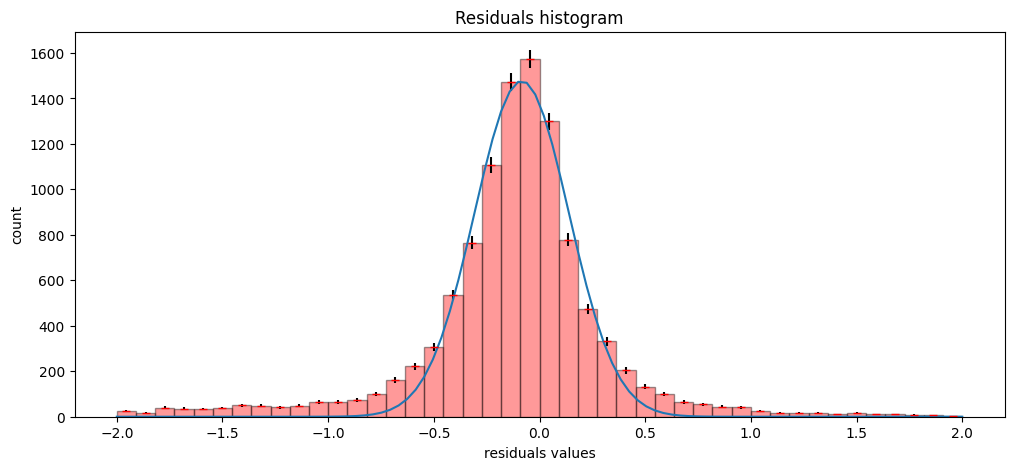

In [263]:
# data input
with open("data/residuals_261.pkl", 'rb') as inFile:
    res = (pickle.load(inFile).item())['residuals']

# number of bins
binNumber = int(2*(len(res)**(1/3)))

# plot histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
n, bins, _ = ax.hist(res, bins=binNumber, range=(-2,2), color='red', alpha=0.4, edgecolor='k')
ax.set_xlabel("residuals values")
ax.set_ylabel("count")
ax.set_title("Residuals histogram")

# bins centers
cent = [(bins[i]+bins[i+1])/2 for i in range(len(bins) - 1)]

# uncertainty
unc = np.sqrt(n)

# add the error bars to the plot
ax.errorbar(cent, n, unc, fmt="_", ecolor="k",color="r")

# fitting with a Gaussian function
def f(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

# calculate the most appropriate parameters
popt, pcov = sp.optimize.curve_fit(f, cent, n, p0=[1500, 0, 2], full_output=False)

# display the results and plot
print("FIT PARAMETERS")
print("\tamplitude: %.3f, err: %.3f" %(popt[0], np.sqrt(pcov[0,0])))
print("\taverage: %.3f, err: %.3f" %(popt[1], np.sqrt(pcov[1,1])))
print("\tsigma: %.3f, err: %.3f" %(popt[2], np.sqrt(pcov[2,2])))

x= np.linspace(-2,2,100)
ax.plot(x, f(x, popt[0], popt[1], popt[2]))
fig.show()

In [264]:
# chi-squared test to determine the goodness of the fit
chi2 = np.sum(((n - f(cent, popt[0], popt[1], popt[2]))**2)/n**2)
# degrees of freedom
DoF = len(n)-1
print("chi-2 value: %.2f" %chi2)
# probability value pval
pval = 1.0-sp.stats.chi2.cdf(chi2, df=DoF)
print("p value: %.2f" %pval)
print("this indicates that the fit is satisfactory.")

chi-2 value: 30.64
p value: 0.92
this indicates that the fit is satisfactory.


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [ ]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

there are some clear outliers so we remove them


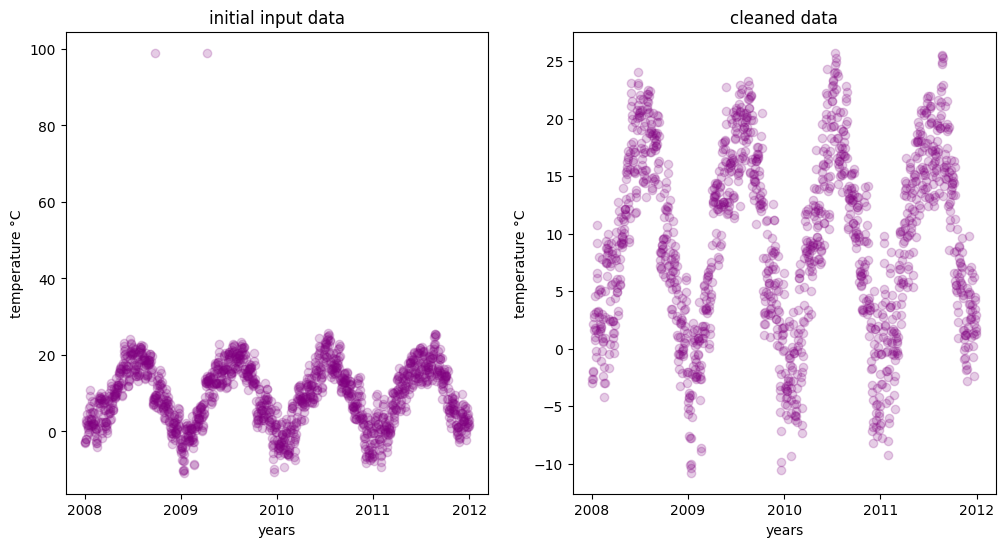

In [268]:
# input data
with open("data/munich_temperatures_average_with_bad_data.txt") as fin:
    df = pd.read_table(fin, sep=' ', names=['day', 'temp'])
# selecting the range of date we are interested in
df = df[(df['day']>2008) & (df['day']<2012)]

# plotting the input data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].scatter(df['day'].values, df['temp'].values, color='purple', alpha=0.2)
ax[0].set_xlabel("years")
ax[0].set_ylabel("temperature °C")
ax[0].set_xticks(np.arange(2008, 2013))
ax[0].set_title("initial input data")
print("there are some clear outliers so we remove them")

# removing outliers: temperatures outside of the +-50C are not plausible 
df = df.drop(df[df['temp']>50].index)
df = df.drop(df[df['temp']<-50].index)

# plotting the cleaned data
ax[1].scatter(df['day'].values, df['temp'].values, color='purple', alpha=0.2)
ax[1].set_xlabel("years")
ax[1].set_ylabel("temperature °C")
ax[1].set_xticks(np.arange(2008, 2013))
ax[1].set_title("cleaned data")
fig.show()

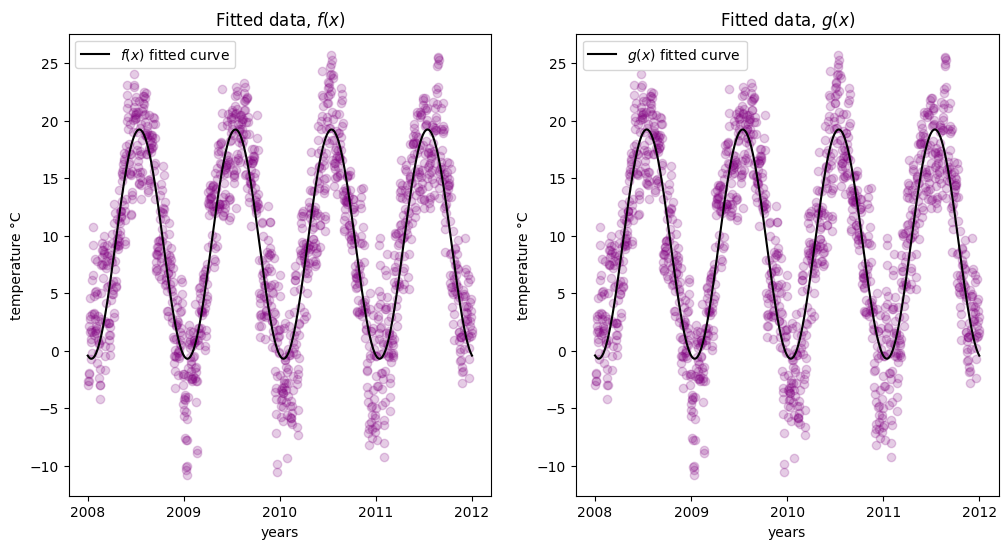

In [269]:
# defining the two fitting functions
# the specified parameters are:
#   a: the amplitude of the oscillations
#   b: the initial phase of the sinusoidal: if we start measuring during a hot period of the year,
#      we want the cosine to be around a point of maximum, while if the measurement starts during winter,
#      we want to start the cosine near a point of minimum.
#   c: offset since the average of the temperatures is not centred around zero
def f(x, a, b, c):
    return a*np.cos(2*np.pi*x+b)+c

# the specified parameters are:
#   a: the amplitude of the oscillations
#   b: the frequency of the oscillations (we have a periodicity of roughly 1 year). Note that since we are taking a measurement 
#      each day and the function already contains the factor 2*pi inside the cosine, the frequency will be =1.
#   c: the initial phase of the sinusoidal: if we start measuring during a hot period of the year,
#      we want the cosine to be around a point of maximum, while if the measurement starts during winter,
#      we want to start the cosine near a point of minimum.
#   d: offset since the average of the temperatures is not centred around zero
def g(x, a, b, c, d):
    return a*np.cos(2*np.pi*b*x + c)+d

# finding the optimal parameters for both f and g functions
days = df['day'].values
temps = df['temp'].values
popt_f, pcov_f = sp.optimize.curve_fit(f, days, temps, p0=[25, 0, 7], full_output=False)
popt_g, pcov_g = sp.optimize.curve_fit(g, days, temps, p0=[25, 1, 0, 7], full_output=False)

# plotting the fit with both g and f functions
x = np.linspace(2008, 2012, 1000)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# f
ax[0].scatter(df['day'].values, df['temp'].values, color='purple', alpha=0.2)
ax[0].plot(x, f(x, popt_f[0], popt_f[1], popt_f[2]), color='black', label = '$f(x)$ fitted curve')
ax[0].set_xlabel("years")
ax[0].set_ylabel("temperature °C")
ax[0].set_xticks(np.arange(2008, 2013))
ax[0].set_title("Fitted data, $f(x)$")
ax[0].legend()

# g
ax[1].scatter(df['day'].values, df['temp'].values, color='purple', alpha=0.2)
ax[1].plot(x, g(x, popt_g[0], popt_g[1], popt_g[2], popt_g[3]), color='black', label = '$g(x)$ fitted curve')
ax[1].set_xlabel("years")
ax[1].set_ylabel("temperature °C")
ax[1].set_xticks(np.arange(2008, 2013))
ax[1].set_title("Fitted data, $g(x)$")
ax[1].legend()
fig.show()


In [270]:
# parameters of the two fits
print("PARAMETERS OF f(x):")
print("\tamplitude a: %.2f, err: %.2f" %(popt_f[0], np.sqrt(pcov_f[0,0])))
print("\tinitial phase b: %.2f, err: %.2f" %(popt_f[1], np.sqrt(pcov_f[1,1])))
print("\toffset c: %.2f, err: %.2f" %(popt_f[2], np.sqrt(pcov_f[2,2])))

print("\nPARAMETERS OF g(x):")
print("\tamplitude a: %.2f, err: %.2f" %(popt_g[0], np.sqrt(pcov_g[0,0])))
print("\tfrequency b: %.2f, err: %.2f" %(popt_g[1], np.sqrt(pcov_g[1,1])))
print("\tinitial phase c: %.2f, err: %.2f" %(popt_g[2], np.sqrt(pcov_g[2,2])))
print("\toffset d: %.2f, err: %.2f" %(popt_g[3], np.sqrt(pcov_g[3,3])))


PARAMETERS OF f(x):
	amplitude a: -9.96, err: 0.13
	initial phase b: -0.23, err: 0.01
	offset c: 9.26, err: 0.09

PARAMETERS OF g(x):
	amplitude a: -9.96, err: 0.13
	frequency b: 1.00, err: 0.00
	initial phase c: -3.94, err: 23.79
	offset d: 9.27, err: 0.10


In [283]:
# calculate the required averages
print("overall average year-round temperature: %.2f°C\n" %np.mean(df['temp']))

# setting the threshold for hot at 15°C and cold at 5°C, comparing the model and the real data
h_th = 15
c_th = 5
real_hot_temps = temps[temps>h_th]
real_cold_temps = temps[temps<c_th]
real_hot_avg = np.mean(real_hot_temps)
real_cold_avg = np.mean(real_cold_temps)


model_temps = f(x, popt_f[0], popt_f[1], popt_f[2])
model_cold_temps = model_temps[model_temps<c_th]
model_hot_temps = model_temps[model_temps>h_th]
model_hot_avg = np.mean(model_hot_temps)
model_cold_avg = np.mean(model_cold_temps)

print("real average of hot days: %.2f" %real_hot_avg)
print("real average of cold days: %.2f" %real_cold_avg)
print("model average of hot days: %.2f" %model_hot_avg)
print("model average of cold days: %.2f" %model_cold_avg)


overall average year-round temperature: 9.26°C

real average of hot days: 18.63
real average of cold days: -0.03
model average of hot days: 17.78
model average of cold days: 1.28


In [ ]:
# fisher f test
